In [1]:
#IMPORT lIBRARIES
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [3]:
#IMPORT DISPLAY For Data Frame

from IPython.display import display

In [4]:
#Read dataset
data=pd.read_csv('C:/Users/tejve/Downloads/creditcard.csv//creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
##preserving only necessary column
data_class_outcomes=data['Class']
data.shape

(284807, 31)

In [7]:
##deleting the unnecessary columns
data.drop(['Class'],axis=1,inplace=True)

In [8]:
##importing library for splitting the data
from sklearn.model_selection import train_test_split

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(data,data_class_outcomes,test_size=0.25,random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier

    

In [11]:
def random_forest(xtrain,ytrain,xtest):
    Decision_tree=RandomForestClassifier(n_estimators=98)
    Decision_tree.fit(xtrain,ytrain)
    predict=Decision_tree.predict(xtest)
    return predict
    

In [12]:
y_pred = random_forest(xtrain,ytrain,xtest)

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
def calculate_confusion_matrix(ytest,y_pred):
    return confusion_matrix(ytest,y_pred)

[[71083     6]
 [   23    90]]


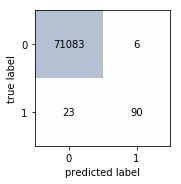

In [15]:
result=calculate_confusion_matrix(ytest,y_pred)
print (result)
fig, ax = plot_confusion_matrix(conf_mat=result)
plt.show()

In [16]:
#caluclate Precision and Recall
def calculate_add_scores(confusion_matrix,Classifier="RFC"):
    TP = float(confusion_matrix[0][0])
    FN = float(confusion_matrix[0][1])
    FP = float(confusion_matrix[1][0])
    TN = float(confusion_matrix[1][1])
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    precision = (TP/(TP+FP))
    recall = (TP/(TP+FN))
    values = [{'Classifier':Classifier,'Accuracy':accuracy,'Precision':precision,
              'Recall':recall}]
    dataframe = pd.DataFrame(values,columns=values[0].keys())
    return dataframe

In [17]:
df = calculate_add_scores(result)
print(df)

     Recall Classifier  Precision  Accuracy
0  0.999916        RFC   0.999677  0.999593


In [18]:
##Droping Time Feature

In [19]:
#Drop Time
data_time=data['Time']
data.drop(['Time'],axis=1,inplace=True)
xtrain, xtest, ytrain, ytest = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)


[[71083     6]
 [   22    91]]


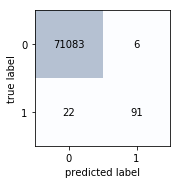

     Recall Classifier  Precision  Accuracy
0  0.999916        RFC   0.999677  0.999593
0  0.999916        RFC   0.999691  0.999607


In [20]:
ypred = random_forest(xtrain,ytrain,xtest)
confusion_matrix_1= calculate_confusion_matrix(ytest,ypred)
print confusion_matrix_1
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_1)
plt.show()
new_df = calculate_add_scores(confusion_matrix_1)

frames = [df,new_df]
df = pd.concat(frames)
print(df)



In [21]:
##Drop Amount

In [22]:
data_amount_outcomes = data['Amount']
data.drop(['Amount'], axis = 1, inplace = True)
xtrain, xtest, ytrain, ytest = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)

[[71084     5]
 [   23    90]]


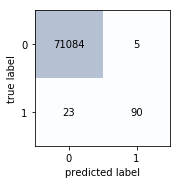

     Recall Classifier  Precision  Accuracy
0  0.999916        RFC   0.999677  0.999593
0  0.999916        RFC   0.999691  0.999607
0  0.999930        RFC   0.999677  0.999607


In [23]:
ypred = random_forest(xtrain,ytrain,xtest)
confusion_matrix_2= calculate_confusion_matrix(ytest,ypred)
print confusion_matrix_2
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_2)
plt.show()

new_df = calculate_add_scores(confusion_matrix_2)

frames = [df,new_df]
df = pd.concat(frames)
print(df)


In [24]:
#Normalize Amount

In [25]:
data['Amount']=(data_amount_outcomes-data_amount_outcomes.mean())/data_amount_outcomes.std()

In [26]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


[[71083     6]
 [   24    89]]


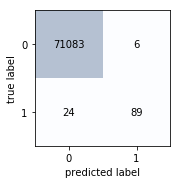

     Recall Classifier  Precision  Accuracy
0  0.999916        RFC   0.999677  0.999593
0  0.999916        RFC   0.999691  0.999607
0  0.999930        RFC   0.999677  0.999607
0  0.999916        RFC   0.999662  0.999579


In [27]:
xtrain,xtest, ytrain, ytest = train_test_split(data,data_class_outcomes,test_size=0.25, random_state=42)
ypred = random_forest(xtrain,ytrain,xtest)
confusion_matrix_3= calculate_confusion_matrix(ytest,ypred)
print confusion_matrix_3
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_3)
plt.show()
new_df = calculate_add_scores(confusion_matrix_3)
frames = [df,new_df]
df = pd.concat(frames)
print(df)

In [28]:
##Decision Tree classifier

[[56855     9]
 [   21    77]]


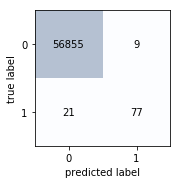

     Recall            Classifier  Precision  Accuracy
0  0.999916                   RFC   0.999677  0.999593
0  0.999916                   RFC   0.999691  0.999607
0  0.999930                   RFC   0.999677  0.999607
0  0.999916                   RFC   0.999662  0.999579
0  0.999842  DTC with max_depth=6   0.999631  0.999473


In [29]:
#Classifier = DTC, with max_depth=6
from sklearn import tree
xtrain, xtest, ytrain, ytest = train_test_split(data,data_class_outcomes,test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42,max_depth=6)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
confusion_matrix_4 = calculate_confusion_matrix(ytest,ypred)
print confusion_matrix_4
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_4)
plt.show()

new_df = calculate_add_scores(confusion_matrix_4,Classifier="DTC with max_depth=6")

frames = [df,new_df]
df = pd.concat(frames)
print(df)

In [30]:
#Classifier = DTC, with max_depth=7

[[56855     9]
 [   20    78]]


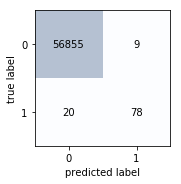

     Recall            Classifier  Precision  Accuracy
0  0.999916                   RFC   0.999677  0.999593
0  0.999916                   RFC   0.999691  0.999607
0  0.999930                   RFC   0.999677  0.999607
0  0.999916                   RFC   0.999662  0.999579
0  0.999842  DTC with max_depth=6   0.999631  0.999473
0  0.999842  DTC with max_depth=7   0.999631  0.999473


In [31]:
#Classifier = DTC, with max_depth=7

xtrain, xtest, ytrain, ytest = train_test_split(data,data_class_outcomes,test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(random_state=42,max_depth=7)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
confusion_matrix_5 = calculate_confusion_matrix(ytest,ypred)
print confusion_matrix_5
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_5)
plt.show()
new_df = calculate_add_scores(confusion_matrix_4,Classifier="DTC with max_depth=7")

frames = [df,new_df]
df = pd.concat(frames)
print(df)